In [45]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [40]:
os.listdir("results")

['filtered_drug_profiles_123.csv',
 'filtered_drug_profiles_12.csv',
 'filtered_drug_profiles_13.csv',
 'filtered_drug_profiles_23.csv',
 '.ipynb_checkpoints',
 'kernel_learning_1_2.csv',
 'merged_drug_profiles_sigmoid4_123.csv',
 'drug_features_pubchem_id.csv',
 'drug_features_with_pubchem_properties.csv',
 'merged_fitted_sigmoid4_123_with_drugs_description.csv',
 'merged_fitted_sigmoid4_123_with_drugs_properties.csv',
 'merged_fitted_sigmoid4_123_with_drugs_description_split_target.csv',
 'merged_fitted_sigmoid4_123_with_drugs_properties_split_target.csv',
 'kernel_learning_1.csv',
 'kernel_learning_2.csv',
 'kernel_learning_3.csv',
 'test02_merged_fitted_sigmoid4_123_with_drugs_properties.csv',
 'test02_merged_fitted_sigmoid4_123_with_drugs_description.csv',
 'train08_merged_fitted_sigmoid4_123_with_drugs_description.csv',
 'train08_merged_fitted_sigmoid4_123_with_drugs_properties.csv',
 'kernel_learning_2_2.csv',
 'kernel_learning_3_2.csv',
 'kernel_learning_4.csv',
 'Lasso_1.csv',

In [8]:
train_123 = pd.read_csv("results/train08_merged_fitted_sigmoid4_123_with_drugs_properties.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [9]:
train_123.columns[-20:]

Index(['3bonds', 'Mitosis', 'WNT signaling', 'bond_stereo_count', 'complexity',
       'P', 'H', 'Cl', 'rotatable_bond_count', 'undefined_atom_stereo_count',
       'B', 'defined_atom_stereo_count', 'molecular_formula', 'second_target',
       'Other, kinases', 'Metabolism', 'JNK and p38 signaling', 'Drug_Name',
       'Cytoskeleton', 'MAX_CONC'],
      dtype='object')

### Average sigmoid

In [10]:
norm_response  = ["norm_cells_"+str(i) for i in range(10)]
conc_columns  = ["fd_num_"+str(i) for i in range(10)]

col_not_to_use = ["Unnamed: 0", "Unnamed: 0.1", 'DRUG_ID', 'COSMIC_ID', 'Drug_Name', 
                  "Synonyms", "Target", "deriv_found", "PubChem_ID","elements", "inchi_key",
                  "canonical_smiles", "inchi_string", "molecular_formula",
                  "third_target", "first_target", "second_target", "Target_Pathway"]

columns_to_use = ['DRUG_ID', 'COSMIC_ID', 'Drug_Name'] + list(set(train_123.columns)
                                                              -set(norm_response)-set(conc_columns)
                                                              -set(col_not_to_use))
train = np.zeros([1, len(columns_to_use)+2])
for i in range(10):
    train = np.vstack((train, train_123[columns_to_use + ["fd_num_"+str(i), "norm_cells_"+str(i)]].values))

In [11]:
train.shape, train_123.shape

((18171, 1132), (1817, 1154))

In [27]:
train_df_full = pd.DataFrame(data= train[1:,:], columns = columns_to_use + ["x_conc", "y_response"])
train_df_full["x_conc"]= train_df_full["x_conc"].astype("float32")
train_df_full["y_response"]= train_df_full["y_response"].astype("float32")

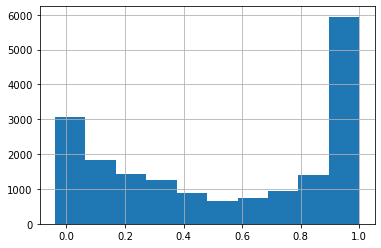

In [28]:
train_df_full["y_response"].hist();

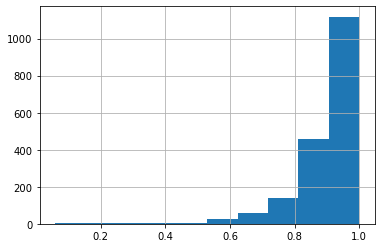

In [35]:
train_df_full[train_df_full["x_conc"]==0.22222222]["y_response"].hist();

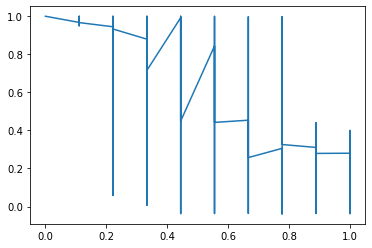

In [38]:
plt.plot(train_df_full["x_conc"], train_df_full["y_response"]);

### Support Vector Regression 

In [46]:
columns_for_normalisation = ['molecular_weight','rotatable_bond_count', 'h_bond_acceptor_count',
 'undefined_atom_stereo_count', 'bond_stereo_count', 'defined_atom_stereo_count',
 'complexity', 'atom_stereo_count','covalent_unit_count','2bonds',
 'surface_area', 'xlogp', 'heavy_atom_count', "x_conc"]

scaler = MinMaxScaler()
scaler.fit(train_df_full[columns_for_normalisation])
train_df_full[columns_for_normalisation] = scaler.transform(train_df_full[columns_for_normalisation])

X_columns = train_df_full.columns[3:-1]
X = train_df_full[X_columns].values
y = train_df_full["y_response"].values  

sm.families()

bayesian regression
Non linear regression https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab
decision trees for sparse data
support vector
kernel ridge
https://online.stat.psu.edu/stat504/node/216/